In [1]:
#!usr/bin/python

""" Imports and plots the E values for the simulated vs. actual 
    ecosystem data. Also looks at the frequency distributions 
    of the E values in both simulated and actual fitted results."""

__author__ = 'Katie Hindson (kah15@ic.ac.uk)'
__version__ = '0.0.1'
		
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.patches as mpatches
import random
%matplotlib inline

## This is using the data's ranges split by 10 degrees bands

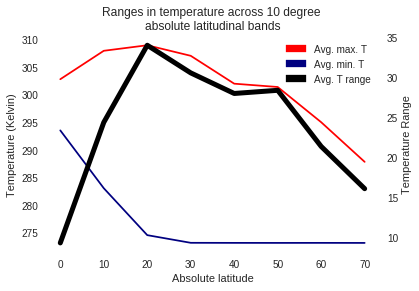

In [2]:
temp_range_all = pd.read_csv("../Data/median_temps/lognormal_dist/temp_wrt_lat/temp_ranges_sites.csv")
                          
# making a plot of the latitude vs. temperature range (All lats)

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(temp_range_all.lats_num, temp_range_all.min_temps, color = 'navy', label = 'Avg. min. T')
ax1.set(xlabel='Absolute latitude', ylabel='Temperature (Kelvin)', 
        title = 'Ranges in temperature across 10 degree \nabsolute latitudinal bands')
plt.plot(temp_range_all.lats_num, temp_range_all.max_temps, color = 'red', label = 'Avg. max. T')
ax1.set_facecolor('white')
ax1.grid(False)
ax2 = ax1.twinx()
plt.plot(temp_range_all.lats_num, temp_range_all.T_range, color = 'black', label = 'Avg. T range', linewidth = 5)
ax2.set(ylabel='Temperature Range')
ax2.set_facecolor('white')
ax2.grid(False)

red_patch = mpatches.Patch(color = 'red', label = 'Avg. max. T')
blue_patch = mpatches.Patch(color='navy',  label = 'Avg. min. T')
black_patch = mpatches.Patch(color = 'black', label = 'Avg. T range')
plt.legend(handles=[red_patch, blue_patch, black_patch])

## Building a data frame with simulation having temp range w.r.t. abs. lat. and the actual fluxnet fit results 

In [3]:
sim_df = pd.read_csv('../Results/median_temps/lognormal_dist/temp_wrt_lat/med_temps_NOT_CONVERTED_constant_species_15_simulated_E_B0.csv')
actual_df = pd.read_csv("../Results/median_temps/sites_boltz_fit_median_temps_only_results.csv")
fluxnet_df = pd.read_pickle("../Data/median_temps/fluxnet_median_temps_only.pkl")

# sorting into ascending order of siteID values since this way the indexing of the 
# two data frames will be the same.

actual_df = actual_df.sort_values(by = 'site_ID', ascending = True)
sim_df = sim_df.sort_values(by = 'siteID', ascending = True)

# getting the simulated E and lnB0 values as the means of the 150 iterations
E_sim_mean = sim_df.groupby('siteID')['E'].mean().tolist()
E_sim_median = sim_df.groupby('siteID')['E'].median().tolist()
E_actual_temp_range = np.array(fluxnet_df.groupby('siteID')['TA_F_inKelvin'].max()) - np.array(fluxnet_df.groupby('siteID')['TA_F_inKelvin'].min())

# Making a data frame of the site IDs and their corresponding E simulated and E actual.

E_vals = pd.DataFrame({'siteID' : actual_df.site_ID, 'E_sim_mean' : E_sim_mean,
                       'E_sim_median' : E_sim_median, 'E_actual' : actual_df.E, 
                       'lat': actual_df.lat, 'actual_temp_range' : E_actual_temp_range})

# removing any values that are Nan
E_vals = E_vals[E_vals.siteID.notnull()]
E_vals = E_vals[E_vals.E_sim_mean.notnull()]
E_vals = E_vals[E_vals.E_sim_median.notnull()]
E_vals = E_vals[E_vals.E_actual.notnull()]
E_vals = E_vals[E_vals.E_sim_mean != -np.inf]
E_vals = E_vals[E_vals.E_actual > 0]
E_vals = E_vals[E_vals.E_actual < 2]

## Plotting the function that temperature range is following w.r.t. lat (that is implemented in the simulation)

Polynomial fitted: -0.01x^2 + 0.66x + 13.98
R-squared value fo the fit: 0.153399152076


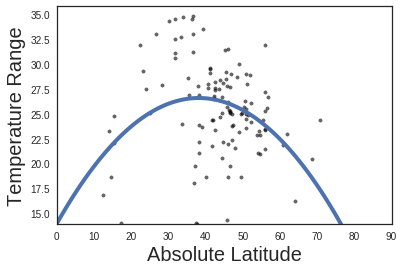

In [4]:
coeffs = np.polyfit(np.abs(E_vals.lat), E_vals.actual_temp_range, 2)
p = np.poly1d(coeffs)
xp = np.linspace(0, 80, 100)
min_val = min(E_vals.actual_temp_range) + 1
max_val = max(E_vals.actual_temp_range) + 1

boundaries = [0, 36.0, 41.0, 46.0, 50.0, 90]


with plt.style.context("seaborn-white"):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plt.scatter(np.abs(E_vals.lat), E_vals.actual_temp_range, color = 'black', alpha = 0.6, s = 12)
    plt.plot(xp, p(xp), '-', linewidth = 4)
    plt.xlabel('Absolute Latitude', fontsize = 20)
    plt.ylabel('Temperature Range', fontsize = 20)
    #plt.title('Absolute latitude vs. temperature \nranges for sites in Fluxnet', fontsize = 16)
    plt.xlim([0, 90])
    plt.ylim([min_val, max_val])
    
    #plt.fill([boundaries[0], boundaries[1], boundaries[1], boundaries[0]], [min_val, min_val, max_val, max_val], 
    #         'gainsboro', alpha = 0.1)
    #plt.fill([boundaries[1], boundaries[2], boundaries[2], boundaries[1]], 
    #         [min_val, min_val, max_val, max_val], 'darkgray', alpha = 0.2)
    #plt.fill([boundaries[2], boundaries[3], boundaries[3], boundaries[2]], 
    #         [min_val, min_val, max_val, max_val], 'dimgray', alpha = 0.2)
    #plt.fill([boundaries[3], boundaries[4], boundaries[4], boundaries[3]], 
    ##         [min_val, min_val, max_val, max_val], 'black', alpha = 0.2)
    #plt.fill([boundaries[4], boundaries[5], boundaries[5], boundaries[4]], [min_val, min_val, max_val, max_val], 
    #         'black', alpha = 0.3)
    
    results = {}
    # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()


    # fit values, and mean
    yhat = p(np.abs(E_vals.lat))                       # or [p(z) for z in x]
    ybar = np.sum(E_vals.actual_temp_range)/len(E_vals.actual_temp_range)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((E_vals.actual_temp_range - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot
    
print('Polynomial fitted: ' + str(round(results['polynomial'][0], 2)) + 'x^2 + ' + str(round(results['polynomial'][1], 2)) + 'x + ' + str(round(results['polynomial'][2], 2)))
print('R-squared value fo the fit: ' + str(results['determination']))

## Adding variance in the E values across latitude gradients to the df

In [5]:
E_vals['abs_lat'] = np.abs(E_vals.lat)
E_vals['lat_range'] = [np.nan] * len(E_vals.abs_lat)
E_vals['var_E'] = [np.nan] * len(E_vals.abs_lat)
E_vals['var_E_actual'] = [np.nan] * len(E_vals.abs_lat)

E_vals.lat_range.loc[(E_vals.abs_lat > -1) & (E_vals.abs_lat <= 30)] = ['0-30 (Tropical Lat)'] * len(E_vals[(E_vals.abs_lat > -1) & (E_vals.abs_lat <= 30)].siteID)
E_vals.lat_range.loc[(E_vals.abs_lat > 30) & (E_vals.abs_lat <= 60)] = ['31-60 (Mid Lat)'] * len(E_vals[(E_vals.abs_lat > 30) & (E_vals.abs_lat <= 60)].siteID)
E_vals.lat_range.loc[(E_vals.abs_lat > 60) & (E_vals.abs_lat <= 90)] = ['61-90 (Upper Lat)'] * len(E_vals[(E_vals.abs_lat > 60) & (E_vals.abs_lat <= 90)].siteID)

trop_var = np.var(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'])
E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)', 'var_E'] = trop_var

mid_var = np.var(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'])
E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)', 'var_E'] = mid_var

upper_var = np.var(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'])
E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)', 'var_E'] = upper_var

trop_var_actual = np.var(E_vals.E_actual[E_vals.lat_range == '0-30 (Tropical Lat)'])
E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)', 'var_E_actual'] = trop_var_actual

mid_var_actual = np.var(E_vals.E_actual[E_vals.lat_range == '31-60 (Mid Lat)'])
E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)', 'var_E_actual'] = mid_var_actual 

upper_var_actual = np.var(E_vals.E_actual[E_vals.lat_range ==  '61-90 (Upper Lat)'])
E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)', 'var_E_actual'] = upper_var_actual


/home/cmee10/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Actual data E values and their variance vs. absolute latitude

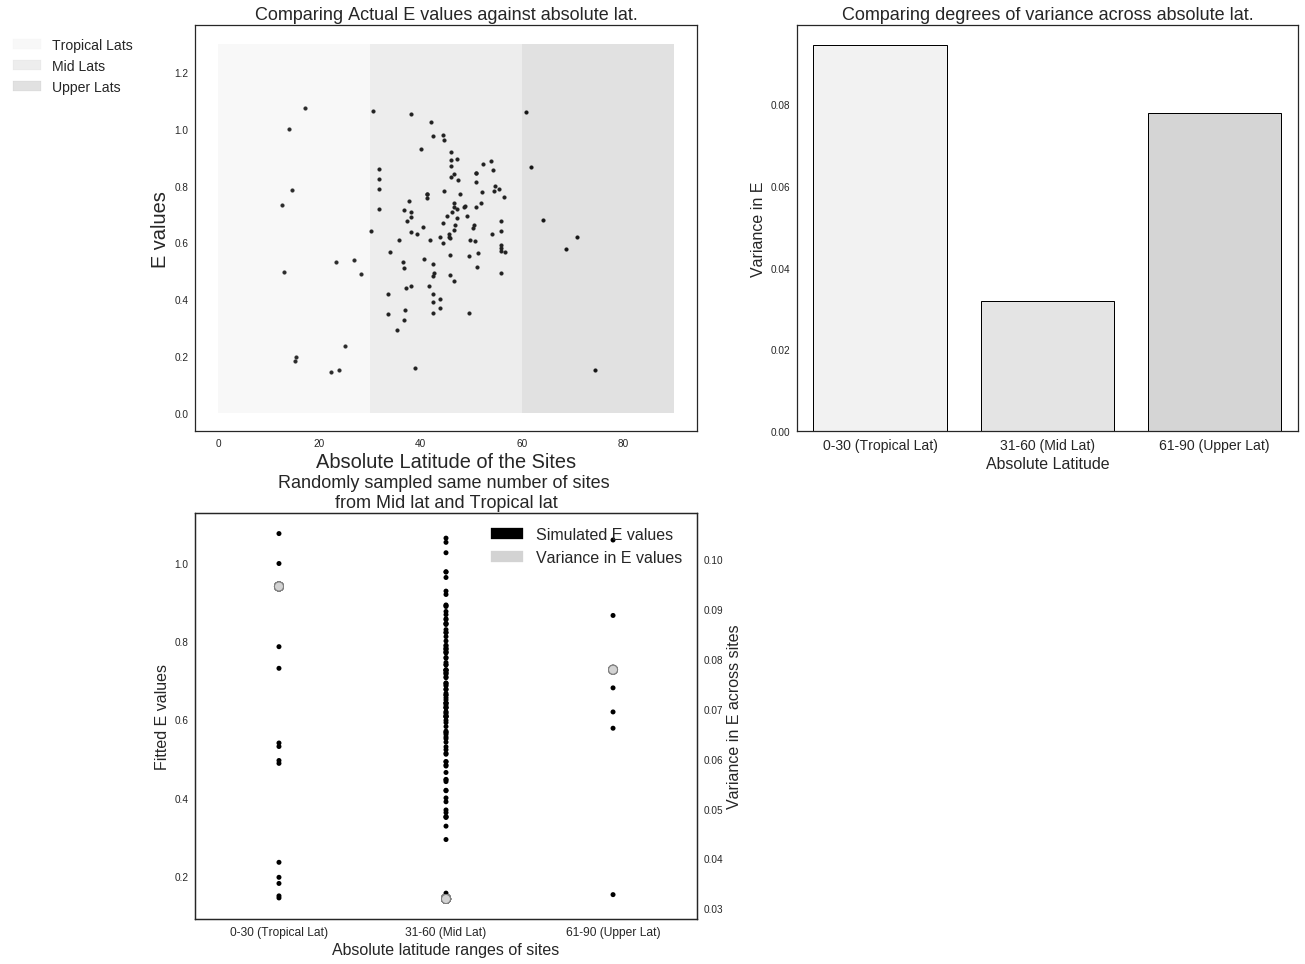

In [6]:
E_vals = E_vals.sort_values(by = 'lat_range', ascending = True)

with plt.style.context("seaborn-white"):
    fig, ax = plt.subplots(figsize = (16, 13))
    fig.tight_layout()
    ax1 = plt.subplot(2, 2, 1)
    plt.fill([0, 30, 30, 0], [0, 0, 1.3, 1.3], 'gainsboro', alpha = 0.2)
    plt.fill([30, 60, 60, 30], [0, 0, 1.3, 1.3], 'darkgray', alpha = 0.2)
    plt.fill([60, 90, 90, 60], [0, 0, 1.3, 1.3], 'dimgray', alpha = 0.2)
    plt.scatter(np.abs(E_vals.lat), E_vals.E_actual, color = 'black', s = 14)
    plt.title('Comparing Actual E values against absolute lat.', 
              fontsize = 18)
    plt.xlabel('Absolute Latitude of the Sites', fontsize = 20)
    plt.ylabel('E values', fontsize = 20)

    low_lat = mpatches.Patch(color='gainsboro', alpha = 0.2, label='Tropical Lats')
    mid_lat = mpatches.Patch(color = 'darkgray', alpha = 0.2, label = 'Mid Lats')
    upper_lat = mpatches.Patch(color = 'dimgray', alpha = 0.2, label = 'Upper Lats')
    plt.legend(bbox_to_anchor=(-0.1, 1.0), handles=[low_lat, mid_lat, upper_lat], fontsize = 14)

    ax2 = plt.subplot(2, 2, 2)
    pal = sns.light_palette("darkgray")
    sns.barplot(E_vals.lat_range, E_vals.var_E_actual, palette = pal, linewidth = 1, edgecolor = 'black')
    ax2.set_title('Comparing degrees of variance across absolute lat.', fontsize = 18)
    ax2.set_ylabel('Variance in E', fontsize = 16)
    ax2.set_xlabel('Absolute Latitude', fontsize = 16)
    ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 14)

    ax3 = plt.subplot(2, 2, 3)
    sns.stripplot(E_vals.lat_range, E_vals.E_actual, color = 'black', label = 'E values')
    ax3.set_xlabel('Absolute latitude ranges of sites', fontsize = 16)
    ax3.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 12)
    ax3.set_ylabel('Fitted E values', fontsize = 16)
    ax3.set_title('Randomly sampled same number of sites \nfrom Mid lat and Tropical lat',
                 fontsize = 18)
    ax4 = ax3.twinx()
    sns.stripplot(E_vals.lat_range, E_vals.var_E_actual, color = 'lightgrey', size = 9, linewidth = 1)
    ax4.set_ylabel('Variance in E across sites', fontsize = 16)

    blue_patch = mpatches.Patch(color='black', label='Simulated E values')
    black_patch = mpatches.Patch(color = 'lightgrey', label = 'Variance in E values')
    plt.legend(handles=[blue_patch, black_patch], fontsize = 16)

## Simulated Es vs. abs. latitude

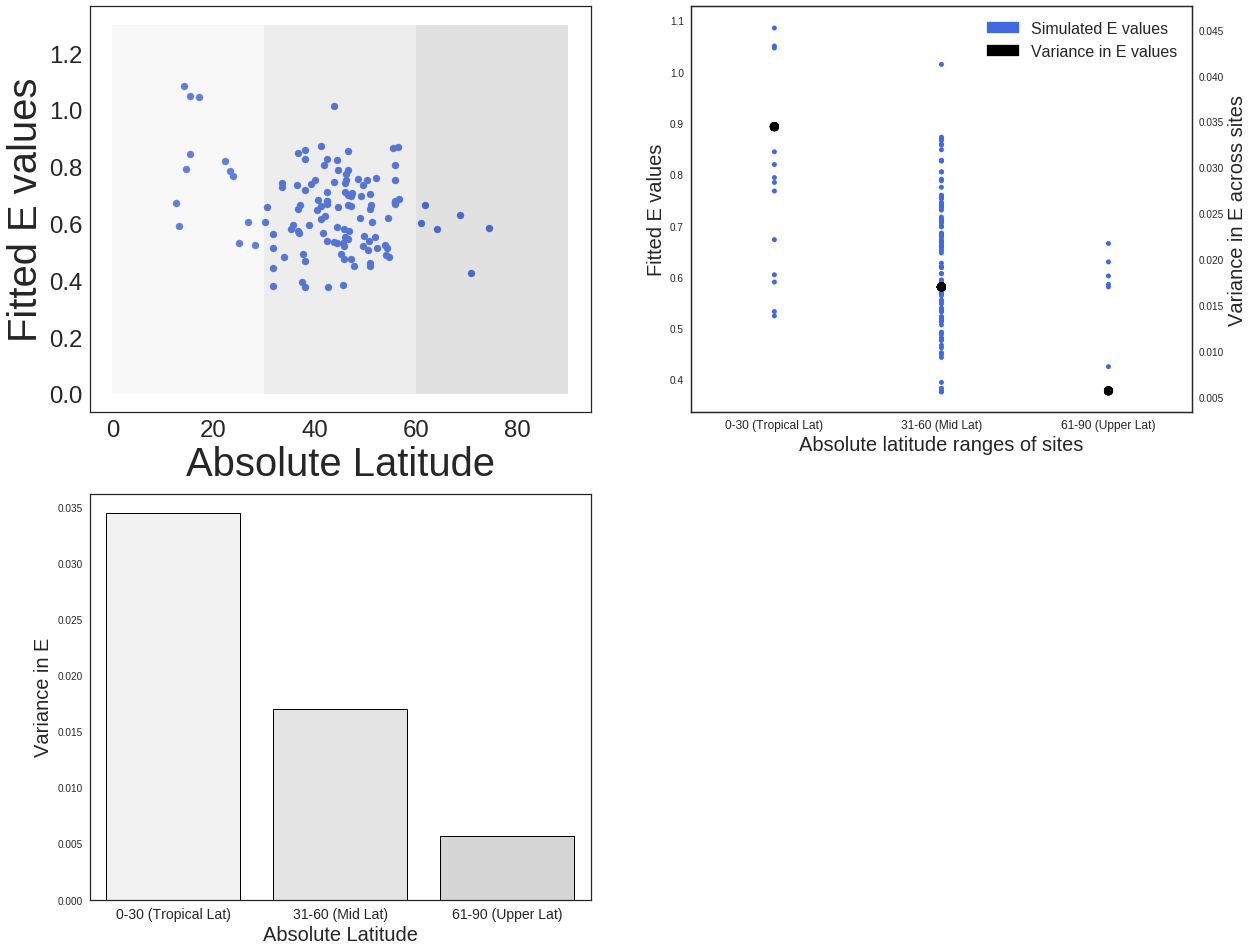

In [7]:
fig, ax = plt.subplots(figsize = (16, 13))
fig.tight_layout()

with plt.style.context("seaborn-white"):
    ax1 = plt.subplot(2, 2, 1)
    plt.fill([0, 30, 30, 0], [0, 0, 1.3, 1.3], 'gainsboro', alpha = 0.2)
    plt.fill([30, 60, 60, 30], [0, 0, 1.3, 1.3], 'darkgray', alpha = 0.2)
    plt.fill([60, 90, 90, 60], [0, 0, 1.3, 1.3], 'dimgray', alpha = 0.2)
    plt.scatter(np.abs(E_vals.lat),  E_vals.E_sim_mean, color = 'royalblue', s = 50)
    #plt.title('Comparing fitted E values against absolute lat. \nin simulation with T range as a function of abs. lat.', 
    #          fontsize = 22)
    plt.xlabel('Absolute Latitude', fontsize = 40)
    plt.ylabel('Fitted E values', fontsize = 40)
    plt.xticks(fontsize = 24)
    plt.yticks(fontsize = 24)

    low_lat = mpatches.Patch(color='gainsboro', alpha = 0.2, label='Tropical Lats')
    mid_lat = mpatches.Patch(color = 'darkgray', alpha = 0.2, label = 'Mid Lats')
    upper_lat = mpatches.Patch(color = 'dimgray', alpha = 0.2, label = 'Upper Lats')
    #plt.legend(bbox_to_anchor=(-0.1, 1.0), handles=[low_lat, mid_lat, upper_lat], fontsize = 16)

    ax2 = plt.subplot(2, 2, 3)
    pal = sns.light_palette("darkgray")
    sns.barplot(E_vals.lat_range, E_vals.var_E, palette = pal, linewidth = 1, edgecolor = 'black')
    #ax2.set_title('Comparing degrees of variance across absolute lat.', fontsize = 22)
    ax2.set_ylabel('Variance in E', fontsize = 20)
    ax2.set_xlabel('Absolute Latitude', fontsize = 20)
    ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 14)

    ax3 = plt.subplot(2, 2, 2)
    sns.stripplot(E_vals.lat_range, E_vals.E_sim_mean, color = 'royalblue', label = 'E values')
    ax3.set_xlabel('Absolute latitude ranges of sites', fontsize = 20)
    ax3.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 12)
    ax3.set_ylabel('Fitted E values', fontsize = 20)
    #ax3.set_title('Randomly sampled same number of sites \nfrom Mid lat and Tropical lat',
              #   fontsize = 22)
    ax4 = ax3.twinx()
    sns.stripplot(E_vals.lat_range, E_vals.var_E, color = 'black', size = 9)
    ax4.set_ylabel('Variance in E across sites', fontsize = 20)

    blue_patch = mpatches.Patch(color='royalblue', label='Simulated E values')
    black_patch = mpatches.Patch(color = 'black', label = 'Variance in E values')
    plt.legend(handles=[blue_patch, black_patch], fontsize = 16)

(0, 0.04)

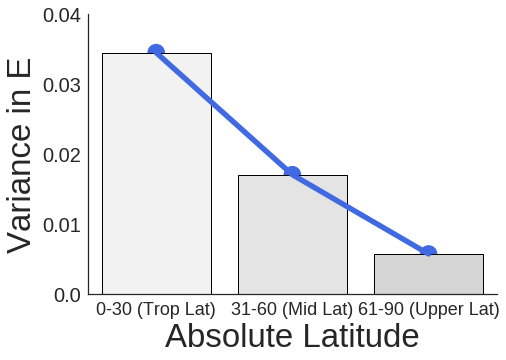

In [8]:
pal = sns.light_palette("darkgray")
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 5}            
sns.set(font_scale=3, style = 'white', rc = paper_rc) 
ax2 = sns.FacetGrid(E_vals, size = 6, aspect = 1.2)
ax2 = ax2.map(sns.barplot, 'lat_range', 'var_E', palette = pal, linewidth = 1, edgecolor = 'black')
ax2 = ax2.map(sns.pointplot,  'lat_range', 'var_E', color = 'royalblue')
ax2.set_axis_labels("Absolute Latitude","Variance in E")
plt.subplots_adjust(top=0.9, left = -0.001)
#ax2.fig.suptitle('Comparing variance across absolute latitude')
ax2.set_xticklabels(['0-30 (Trop Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 18)
ax2.set_yticklabels([0.00, 0.01, 0.02, 0.03, 0.04], fontsize = 20)
axes = ax2.axes
axes[0,0].set_ylim(0,0.04)

#grey_patch = mpatches.Patch(label='Predicted', color = 'dimgrey')
#blue_patch = mpatches.Patch(color = 'royalblue', label = 'Simulated')
#plt.legend(handles = [grey_patch, blue_patch], bbox_to_anchor = (0.8, 1), fontsize = 24)

## Running a Bartlett's test for homogeneity of variance across the three latitudinal groups

In [10]:
trop_mid = stats.bartlett(E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)', 'E_sim_mean'], 
                        E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)', 'E_sim_mean'])
trop_up = stats.bartlett(E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)', 'E_sim_mean'],
                       E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)', 'E_sim_mean'])
mid_up = stats.bartlett(E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)', 'E_sim_mean'],
                      E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)', 'E_sim_mean'])

print("Tropical vs. Mid Lats Levene's test p-value : " + str(trop_mid[1]) + 
     "\nTropical vs. Upper Lats Levene's test p-value : " + str(trop_mid[1]) + 
     "\nMid vs. Upper Lats Levene's test p-value : " + str(mid_up[1]))

print(trop_mid)
print(mid_up)
print(trop_up)

Tropical vs. Mid Lats Levene's test p-value : 0.0495529604574
Tropical vs. Upper Lats Levene's test p-value : 0.0495529604574
Mid vs. Upper Lats Levene's test p-value : 0.227158554541
BartlettResult(statistic=3.8565216000531857, pvalue=0.049552960457370135)
BartlettResult(statistic=1.4585651743443535, pvalue=0.22715855454092126)
BartlettResult(statistic=3.5528487456058837, pvalue=0.059443313774235965)


## Plotting the same as above, but randomly removing samples from the Mid lats, so that there are the same number of samples as the Tropical lats (trying to remove bias in the variation)

In [12]:
# resetting the index values of the dataframe so that I can sample using 
# the row numbers                                                               
E_vals = E_vals.reset_index(drop = True)

# getting the values in the data frame that are in the mid-latitude band
mid_vals = E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)']
# resetting this index so that I have an index starting at 0 for this Series
mid_vals = mid_vals.reset_index(drop = True)

# setting a random seed so that I get the same results for every time I 
# run the code
random.seed(1)

for i in range(0, 150):
    # getting a random set of indeces from the mid_indeces Series that 
    # will be dropped from the Series 
    random_loc = random.sample(range(0, len(mid_vals.siteID)), 
                               (len(E_vals.var_E[E_vals.lat_range == '31-60 (Mid Lat)']) - len(E_vals.var_E[E_vals.lat_range == '0-30 (Tropical Lat)'])))

    # getting this subset of randomly selected mid-latitude observations
    mid_vals_to_remove = mid_vals.loc[random_loc,]

    # removing these observations from the subset of E values to be examined
    E_vals_subset = E_vals.loc[np.logical_not(E_vals.siteID.isin(mid_vals_to_remove.siteID.tolist()))]

    E_vals_subset.loc[E_vals_subset.lat_range == '0-30 (Tropical Lat)', 'var_E'] = np.var(E_vals_subset.E_sim_mean.loc[E_vals_subset.lat_range == '0-30 (Tropical Lat)'])
    E_vals_subset.loc[E_vals_subset.lat_range == '31-60 (Mid Lat)', 'var_E'] = np.var(E_vals_subset.E_sim_mean.loc[E_vals_subset.lat_range == '31-60 (Mid Lat)'])
    E_vals_subset.loc[E_vals_subset.lat_range == '61-90 (Upper Lat)', 'var_E'] = np.var(E_vals_subset.E_sim_mean.loc[E_vals_subset.lat_range == '61-90 (Upper Lat)'])

/home/cmee10/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


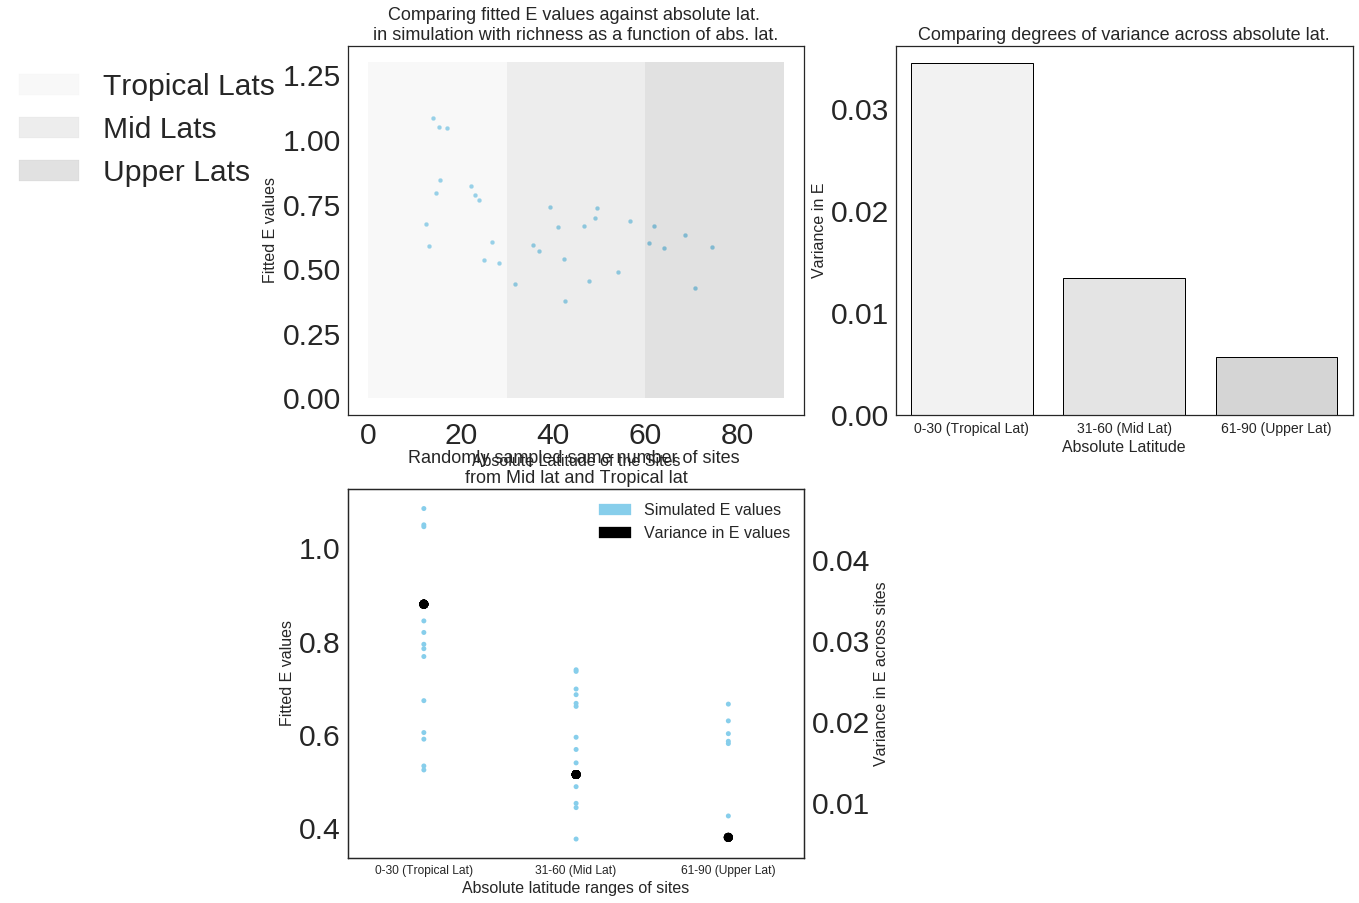

In [13]:
fig, ax = plt.subplots(figsize = (16, 13))
fig.tight_layout()

with plt.style.context("seaborn-white"):
    ax1 = plt.subplot(2, 2, 1)
    plt.fill([0, 30, 30, 0], [0, 0, 1.3, 1.3], 'gainsboro', alpha = 0.2)
    plt.fill([30, 60, 60, 30], [0, 0, 1.3, 1.3], 'darkgray', alpha = 0.2)
    plt.fill([60, 90, 90, 60], [0, 0, 1.3, 1.3], 'dimgray', alpha = 0.2)
    plt.scatter(np.abs(E_vals_subset.lat),  E_vals_subset.E_sim_mean, color = 'skyblue', s = 16)
    plt.title('Comparing fitted E values against absolute lat. \nin simulation with richness as a function of abs. lat.', 
              fontsize = 18)
    plt.xlabel('Absolute Latitude of the Sites', fontsize = 16)
    plt.ylabel('Fitted E values', fontsize = 16)

    low_lat = mpatches.Patch(color='gainsboro', alpha = 0.2, label='Tropical Lats')
    mid_lat = mpatches.Patch(color = 'darkgray', alpha = 0.2, label = 'Mid Lats')
    upper_lat = mpatches.Patch(color = 'dimgray', alpha = 0.2, label = 'Upper Lats')
    plt.legend(bbox_to_anchor=(-0.1, 1.0), handles=[low_lat, mid_lat, upper_lat])

    ax2 = plt.subplot(2, 2, 2)
    pal = sns.light_palette("darkgray")
    sns.barplot(E_vals_subset.lat_range, E_vals_subset.var_E, palette = pal, linewidth = 1, edgecolor = 'black')
    ax2.set_title('Comparing degrees of variance across absolute lat.', fontsize = 18)
    ax2.set_ylabel('Variance in E', fontsize = 16)
    ax2.set_xlabel('Absolute Latitude', fontsize = 16)
    ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 14)

    ax3 = plt.subplot(2, 2, 3)
    sns.stripplot(E_vals_subset.lat_range, E_vals_subset.E_sim_mean, color = 'skyblue', label = 'E values')
    ax3.set_xlabel('Absolute latitude ranges of sites', fontsize = 16)
    ax3.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 12)
    ax3.set_ylabel('Fitted E values', fontsize = 16)
    ax3.set_title('Randomly sampled same number of sites \nfrom Mid lat and Tropical lat',
                 fontsize = 18)
    ax4 = ax3.twinx()
    sns.stripplot(E_vals_subset.lat_range, E_vals_subset.var_E, color = 'black', size = 9)
    ax4.set_ylabel('Variance in E across sites', fontsize = 16)

    blue_patch = mpatches.Patch(color='skyblue', label='Simulated E values')
    black_patch = mpatches.Patch(color = 'black', label = 'Variance in E values')
    plt.legend(handles=[blue_patch, black_patch], fontsize = 16)

(0, 0.08)

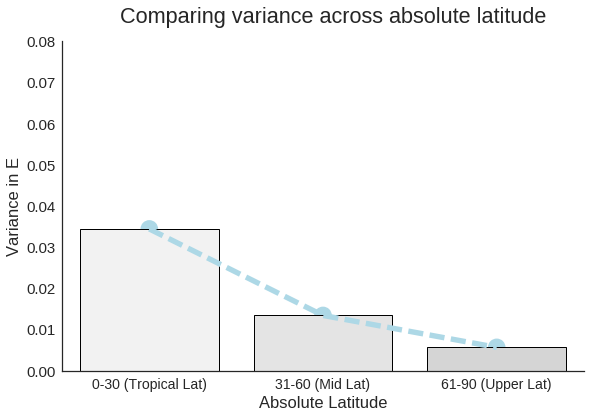

In [14]:
pal = sns.light_palette("darkgray")
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 5}            
sns.set(font_scale=1.5, style = 'white', rc = paper_rc) 
ax2 = sns.FacetGrid(E_vals_subset, size = 6, aspect = 1.25)
ax2 = ax2.map(sns.barplot, 'lat_range', 'var_E', palette = pal, linewidth = 1, edgecolor = 'black')
ax2 = ax2.map(sns.pointplot,  'lat_range', 'var_E', color = 'lightblue', linestyles = 'dashed')
plt.subplots_adjust(top=0.9, left = -0.001)
ax2.fig.suptitle('Comparing variance across absolute latitude') 
ax2.set_axis_labels("Absolute Latitude","Variance in E")
ax2.set_xticklabels(['0-30 (Tropical Lat)','31-60 (Mid Lat)', '61-90 (Upper Lat)'],fontsize = 14)
axes = ax2.axes
axes[0,0].set_ylim(0,0.08)

In [15]:
trop_mid = stats.levene(E_vals_subset.E_sim_mean[E_vals_subset.lat_range == '0-30 (Tropical Lat)'], 
                            E_vals_subset.E_sim_mean[E_vals_subset.lat_range == '31-60 (Mid Lat)'])
mid_upper = stats.levene(E_vals_subset.E_sim_mean[E_vals_subset.lat_range == '31-60 (Mid Lat)'], 
                       E_vals_subset.E_sim_mean[E_vals_subset.lat_range == '61-90 (Upper Lat)'])
trop_upper = stats.levene(E_vals_subset.E_sim_mean[E_vals_subset.lat_range == '61-90 (Upper Lat)'], 
                         E_vals_subset.E_sim_mean[E_vals_subset.lat_range == '0-30 (Tropical Lat)'])

print(trop_mid)
print(mid_upper)
print(trop_upper)

LeveneResult(statistic=1.835225834376097, pvalue=0.18812804511632333)
LeveneResult(statistic=2.9204908988880915, pvalue=0.10565221403427819)
LeveneResult(statistic=3.8672844573679992, pvalue=0.065780680615042372)


## Running Bartlett's to compare simulated and actual in each latitude bin

In [16]:
tropical_lev = stats.bartlett(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'], 
                            E_vals.E_actual[E_vals.lat_range == '0-30 (Tropical Lat)'])

mid_lev = stats.bartlett(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'], 
                       E_vals.E_actual[E_vals.lat_range == '31-60 (Mid Lat)'])

upper_lev = stats.bartlett(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'], 
                         E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'])

overall_lev = stats.bartlett(E_vals.E_sim_mean, E_vals.E_actual)

print('Overall: ' + str(overall_lev))
print('Tropical: ' + str(tropical_lev))
print('Mid: ' + str(mid_lev))
print('Upper: ' + str(upper_lev))


Overall: BartlettResult(statistic=16.631869257896678, pvalue=4.5382031800803575e-05)
Tropical: BartlettResult(statistic=2.8156232869962898, pvalue=0.093350630770817178)
Mid: BartlettResult(statistic=9.9702544030745042, pvalue=0.0015908950883700664)
Upper: BartlettResult(statistic=6.2281187727229854, pvalue=0.012573724743848051)


# Comparing variation of simulation to actual data across the three latitudinal bands 

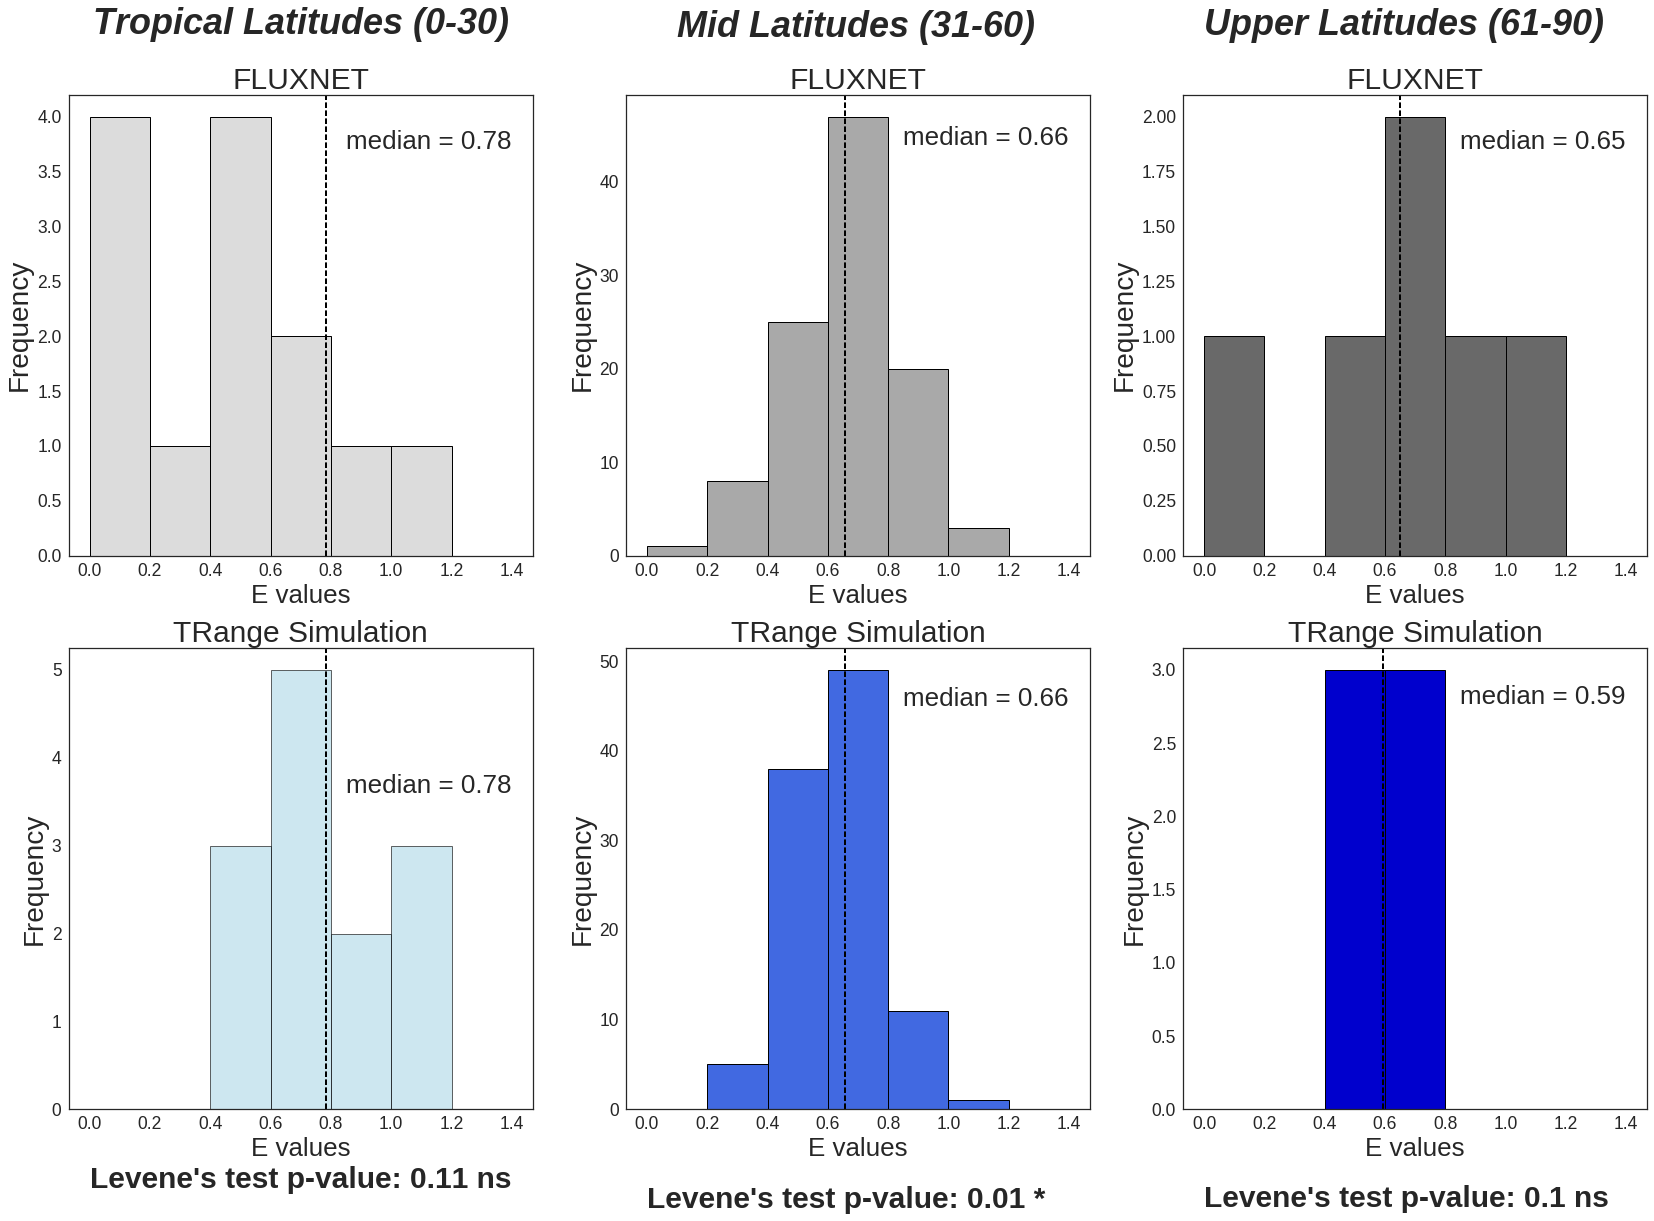

In [18]:
from matplotlib.font_manager import FontProperties

font0 = FontProperties()

font = font0.copy()
font.set_style('italic')
font.set_weight('bold')

fig, ax = plt.subplots(figsize = (23, 15))
fig.tight_layout()          
sns.set(font_scale=1.75, style = 'white', rc = paper_rc) 

ax1 = plt.subplot(2, 3, 4)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'lightblue', alpha = 0.6, 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 26)
plt.ylabel('Frequency', fontsize = 28)
plt.axvline(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2)

plt.title("TRange Simulation", fontsize = 30)
plt.text(0, -0.9, "Levene's test p-value: " + str(round(tropical_lev[1], 2)) + ' ns', fontweight = 'bold', fontsize = 30)
plt.text(0.85, 3.6, 'median = ' + 
         str(np.round(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'].median(), 2)), fontsize = 26)

ax2 = plt.subplot(2, 3, 1)
binwidth = 0.2
plt.hist(E_vals.E_actual[E_vals.lat_range == '0-30 (Tropical Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'gainsboro', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 26)
plt.ylabel('Frequency', fontsize = 28)
plt.axvline(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2)
plt.title("FLUXNET", fontsize = 30)
plt.text(0.85, 3.7, 'median = ' + 
         str(np.round(E_vals.E_sim_mean[E_vals.lat_range == '0-30 (Tropical Lat)'].median(), 2)), fontsize = 26)
plt.text(0.01, 4.75, 'Tropical Latitudes (0-30)', fontsize = 36, fontproperties = font)

ax3 = plt.subplot(2, 3, 5)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'royalblue', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 26)
plt.ylabel('Frequency', fontsize = 28)
plt.axvline(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2)
plt.title("TRange Simulation", fontsize = 30)
plt.text(0.85, 45, 'median = ' + 
         str(np.round(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'].median(), 2)), fontsize = 26)
plt.text(0, -11, "Levene's test p-value: " + str(round(mid_lev[1], 2)) + ' *', fontweight = 'bold', fontsize = 30)

ax4 = plt.subplot(2, 3, 2)
binwidth = 0.2
plt.hist(E_vals.E_actual[E_vals.lat_range == '31-60 (Mid Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'darkgray', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 26)
plt.ylabel('Frequency', fontsize = 28)
plt.axvline(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2)
plt.title("FLUXNET", fontsize = 30)
plt.text(0.85, 44, 'median = ' + 
         str(np.round(E_vals.E_sim_mean[E_vals.lat_range == '31-60 (Mid Lat)'].median(), 2)), fontsize = 26)
plt.text(0.1, 55.5, 'Mid Latitudes (31-60)', fontsize = 36, fontproperties = font)

ax5 = plt.subplot(2, 3, 6)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'mediumblue', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 26)
plt.ylabel('Frequency', fontsize = 28)
plt.axvline(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2)
plt.title("TRange Simulation", fontsize = 30)
plt.text(0.85, 2.77, 'median = ' + 
         str(np.round(E_vals.E_sim_mean[E_vals.lat_range == '61-90 (Upper Lat)'].median(), 2)), fontsize = 26)
plt.text(0, -0.67, "Levene's test p-value: " + str(round(upper_lev[1], 2)) + ' ns', fontweight = 'bold', fontsize = 30)

ax6 = plt.subplot(2, 3, 3)
binwidth = 0.2
plt.hist(E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'], 
         bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'dimgray', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 26)
plt.ylabel('Frequency', fontsize = 28)
plt.axvline(E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'].median(), 
            color='k', linestyle='dashed', linewidth=2)
plt.text(0.85, 1.85, 'median = ' + 
         str(np.round(E_vals.E_actual[E_vals.lat_range == '61-90 (Upper Lat)'].median(), 2)), fontsize = 26)
plt.title("FLUXNET", fontsize = 30)
plt.text(0, 2.37, 'Upper Latitudes (61-90)', fontsize = 36, fontproperties = font)

## Plotting the histograms of the combined latitudes E values

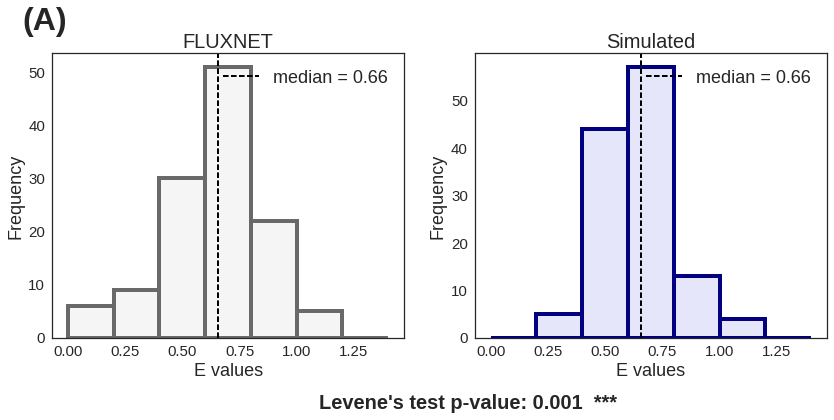

In [19]:
fig, ax = plt.subplots(figsize = (12, 5))
fig.tight_layout()          
sns.set(font_scale=1.5, style = 'white', rc = paper_rc) 

ax1 = plt.subplot(1, 2, 1)
binwidth = 0.2
plt.hist(E_vals.E_actual, bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'whitesmoke', linewidth = 4, edgecolor = 'dimgrey')
plt.xlabel('E values', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.axvline(E_vals.E_actual.median(), color='k', linestyle='dashed', linewidth=2, 
           label = 'median = ' + str(np.round(E_vals.E_actual.median(), 2)))
plt.title("FLUXNET", fontsize = 20)
plt.legend(fontsize = 18)
plt.text(-0.2, 58, '(A)', fontsize = 32, fontweight = 'bold')

ax2 = plt.subplot(1,2,2)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean, bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'lavender', linewidth = 4, edgecolor = 'navy')
plt.xlabel('E values', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.axvline(E_vals.E_sim_mean.median(), color='k', linestyle='dashed', linewidth=2, 
           label = 'median = ' + str(np.round(E_vals.E_sim_mean.median(), 2)))
plt.title("Simulated", fontsize = 20)
plt.legend(fontsize = 18)

plt.text(-0.75, -15, "Levene's test p-value: " + str(round(stats.levene(E_vals.E_sim_mean, E_vals.E_actual)[1], 3)) + '  ***', fontweight = 'bold', fontsize = 20)

## Running F-test to check if the variance values in each simulation overall is the same compared to the actual data

In [20]:
F_actual_sim = np.var(E_vals.E_actual)/np.var(E_vals.E_sim_mean)

df_actual = len(E_vals.E_actual) - 1
df_sim = len(E_vals.E_sim_mean) - 1

p_actual_sim = stats.f.cdf(F_actual_sim, df_actual, df_sim)

print('Overall simulated vs. actual: statistic = ' + str(F_actual_sim) + ', p = ' + str(p_actual_sim))

Overall simulated vs. actual: statistic = 2.11367861753, p = 0.999977316663


## Running F-test to check if the variance values in each simulation lat group is the same compared to the actual data

In [21]:
F_trop = trop_var/trop_var_actual
F_mid = mid_var/mid_var_actual
F_upper = trop_var/mid_var_actual

df_trop = len(E_vals.loc[E_vals.lat_range == '0-30 (Tropical Lat)']) - 1
df_mid = len(E_vals.loc[E_vals.lat_range == '31-60 (Mid Lat)']) - 1
df_upper = len(E_vals.loc[E_vals.lat_range == '61-90 (Upper Lat)']) - 1

p_trop = stats.f.cdf(F_trop, df_trop, df_trop)
p_mid = stats.f.cdf(F_mid, df_mid, df_mid)
p_upper = stats.f.cdf(F_upper, df_upper, df_upper)

print('Tropical : statistic = ' + str(F_trop) + ', p = ' + str(p_trop))
print('Mid: statistic = ' + str(F_mid) + ', p = ' + str(p_mid))
print('Upper: statistic = ' + str(F_upper) + ', p = ' + str(p_upper))

Tropical : statistic = 0.364577295775, p = 0.0466685093352
Mid: statistic = 0.533217436761, p = 0.000795327530577
Upper: statistic = 1.07986790251, p = 0.532571303123


## Removing the E values of sites that were < 0.24 (since biotraits doesn't have any species with fitted E values below this)

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 7 Text yticklabel objects>)

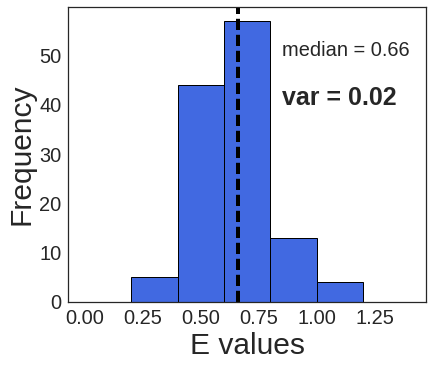

In [22]:
fig, ax = plt.subplots(figsize = (12, 5))
fig.tight_layout()          
sns.set(font_scale=1.5, style = 'white', rc = paper_rc) 

ax2 = plt.subplot(1,2,1)
binwidth = 0.2
plt.hist(E_vals.E_sim_mean, bins=np.arange(0, 1.25 + binwidth, binwidth), color = 'royalblue', 
         linewidth = 1, edgecolor = 'black')
plt.xlabel('E values', fontsize = 30)
plt.ylabel('Frequency', fontsize = 30)
plt.axvline(E_vals.E_sim_mean.median(), color='k', linestyle='dashed', linewidth=4, 
           label = 'median = ' + str(np.round(E_vals.E_sim_mean.median(), 2)))
plt.text(0.85, 50, 'median = ' + str(np.round(E_vals.E_actual.median(), 2)), fontsize = 20)
plt.text(0.85, 40, 'var = ' + str(np.round(np.var(E_vals.E_sim_mean,), 3)), fontsize = 25, fontweight = 'bold')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#plt.text(-0.15, -17, "Levene's test p-value: " + str(round(stats.levene(E_vals.E_sim_mean, E_vals.E_actual)[1], 2)) + '  **', fontweight = 'bold', fontsize = 28)
